# Tech - calcul matriciel avec numpy

[numpy](https://numpy.org/) est la librairie incontournable pour faire des calculs en Python. Ces fonctionnalités sont disponibles dans tous les langages et utilisent les optimisations processeurs. Il est hautement improbable d'écrire un code aussi rapide sans l'utiliser.

[numpy](https://numpy.org/) implémente ce qu'on appelle les opérations matricielles basiques ou plus communément appelées [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms). Quelque soit le langage, l'implémentation est réalisée en langage bas niveau (C, fortran, assembleur) et a été peaufinée depuis 50 ans au gré des améliorations matérielles.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Enoncé

La librairie [numpy](https://numpy.org/) propose principalement deux types : [array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) et [matrix](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html). Pour faire simple, prenez toujours le premier. Ca évite les erreurs. Les [array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) sont des tableaux à plusieurs dimensions.

### La maîtrise du slice

Le slice est l'opérateur ``:`` (décrit sur la page [indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html)). Il permet de récupérer une ligne, une colonne, un intervalle de valeurs.

In [3]:
import numpy

mat = numpy.array([[0, 5, 6, -3],
                   [6, 7, -4, 8],
                   [-5, 8, -4, 9]])
mat

array([[ 0,  5,  6, -3],
       [ 6,  7, -4,  8],
       [-5,  8, -4,  9]])

In [4]:
mat[:2], mat[:, :2], mat[0, 3], mat[0:2, 0:2]

(array([[ 0,  5,  6, -3],
        [ 6,  7, -4,  8]]), array([[ 0,  5],
        [ 6,  7],
        [-5,  8]]), -3, array([[0, 5],
        [6, 7]]))

### La maîtrise du nan

[nan](https://numpy.org/doc/stable/reference/constants.html) est une convention pour désigner une valeur manquante. Elle réagit de façon un peut particulière. Elle n'est égale à aucune autre y compris elle-même.

In [5]:
numpy.nan == numpy.nan

False

In [6]:
numpy.nan == 4

False

Il faut donc utiliser une fonction spéciale [isnan](https://numpy.org/doc/stable/reference/generated/numpy.isnan.html).

In [7]:
numpy.isnan(numpy.nan)

True

### La maîtrise des types

Un tableau est défini par ses dimensions et le type unnique des élélments qu'il contient.

In [8]:
matint = numpy.array([0, 1, 2])
matint.shape, matint.dtype

((3,), dtype('int32'))

C'est le même type pour toute la matrice. Il existe plusieurs type d'entiers et des réels pour des questions de performances.

In [9]:
%timeit matint * matint

388 ns ± 9.38 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
matintf = matint.astype(numpy.float64)
matintf.shape, matintf.dtype

((3,), dtype('float64'))

In [11]:
%timeit matintf * matintf

389 ns ± 2.33 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [12]:
%timeit matintf * matint

691 ns ± 7.37 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Un changement de type et le calcul est plus long.

### La maîtrise du broadcasting

Le [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) signifie que certaines opérations ont un sens même si les dimensions des tableaux ne sont pas tout à fait égales.

In [13]:
mat

array([[ 0,  5,  6, -3],
       [ 6,  7, -4,  8],
       [-5,  8, -4,  9]])

In [14]:
mat + 1000

array([[1000, 1005, 1006,  997],
       [1006, 1007,  996, 1008],
       [ 995, 1008,  996, 1009]])

In [15]:
mat + numpy.array([0, 10, 100, 1000])

array([[   0,   15,  106,  997],
       [   6,   17,   96, 1008],
       [  -5,   18,   96, 1009]])

In [16]:
mat + numpy.array([[0, 10, 100]]).T

array([[  0,   5,   6,  -3],
       [ 16,  17,   6,  18],
       [ 95, 108,  96, 109]])

### La maîtrise des index

In [17]:
mat = numpy.array([[0, 5, 6, -3],
                   [6, 7, -4, 8],
                   [-5, 8, -4, 9]])
mat

array([[ 0,  5,  6, -3],
       [ 6,  7, -4,  8],
       [-5,  8, -4,  9]])

In [18]:
mat == 5

array([[False,  True, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [19]:
mat == numpy.array([[0, -4, 9]]).T

array([[ True, False, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [20]:
(mat == numpy.array([[0, -4, 9]]).T).astype(numpy.int64)

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [21]:
mat * (mat == numpy.array([[0, -4, 9]]).T).astype(numpy.int64)

array([[ 0,  0,  0,  0],
       [ 0,  0, -4,  0],
       [ 0,  0,  0,  9]], dtype=int64)

### La maîtrise des fonctions

On peut regrouper les opérations que [numpy](https://numpy.org/) propose en différents thèmes. Mais avant il 

* L'**initialisation** : [array](https://numpy.org/doc/stable/reference/generated/numpy.array.html), [empty](https://numpy.org/doc/stable/reference/generated/numpy.empty.html), [zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html), [ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), [full](https://numpy.org/doc/stable/reference/generated/numpy.full.html), [identity](https://numpy.org/doc/stable/reference/generated/numpy.identity.html), [rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html), [randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), [randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)
* Les **opérations basiques** : `+`, `-`, `*`, `/`, `@`, [dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)
* Les **transformations** : [transpose](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html), [hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html), [vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html), [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html), [squeeze](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html), [expend_dims](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html)
* Les **opérations de réduction** : [minimum](https://numpy.org/doc/stable/reference/generated/numpy.minimum.html), [maximum](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html), [argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html), [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), [sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [prod](https://numpy.org/doc/stable/reference/generated/numpy.prod.html), [var](https://numpy.org/doc/stable/reference/generated/numpy.var.html), [std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)
* Tout le reste comme la génération de matrices aléatoires, le calcul des valeurs, vecteurs propres, des fonctions commme [take](https://numpy.org/doc/stable/reference/generated/numpy.take.html), ...

### Q1 : calculer la valeur du $\chi_2$ d'un tableau de contingence

La formule est [là](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#Testing_for_statistical_independence). Et il faut le faire sans boucle. Vous pouvez comparer avec la fonction [chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) de la librairie [scipy](https://www.scipy.org/) qui est une extension de [numpy](https://numpy.org/).

$$\chi_2 = N \sum_{i,j} p_{i.} p_{.j} \left( \frac{\frac{O_{ij}}{N} - p_{i.} p_{.j}}{p_{i.} p_{.j}}\right)^2$$

### Q2 : calculer une distribution un peu particulière

La fonction [histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) permet de calculer la distribution empirique de variables. Pour cette question, on tire un vecteur aléatoire de taille 10 avec la fonction [rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html), on les trie par ordre croissant, on recommence plein de fois, on calcule la distribution du plus grand nombre, du second plus grand nombre, ..., du plus petit nombre.

### Q3 : on veut créer une matrice identité un million par un million

Vous pouvez essayer sans réfléchir ou lire cette page d'abord : [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

### Q4 : vous devez créer l'application StopCovid

Il existe une machine qui reçoit la position de 3 millions de téléphones portable. On veut identifier les cas contacts (rapidement).

## Réponses

### Q1 : calculer la valeur du $\chi_2$ d'un tableau de contingence

La formule est [là](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#Testing_for_statistical_independence). Et il faut le faire sans boucle. Vous pouvez comparer avec la fonction [chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) de la librairie [scipy](https://www.scipy.org/) qui est une extension de [numpy](https://numpy.org/).

$$\chi_2 = N \sum_{i,j} p_{i.} p_{.j} \left( \frac{\frac{O_{ij}}{N} - p_{i.} p_{.j}}{p_{i.} p_{.j}}\right)^2$$

In [26]:
import numpy
O = numpy.array([[15., 20., 13.], [4., 9., 5.]])
O

array([[15., 20., 13.],
       [ 4.,  9.,  5.]])

In [27]:
def chi_square(O):
    N = numpy.sum(O)
    pis = numpy.sum(O, axis=1, keepdims=True) / N
    pjs = numpy.sum(O, axis=0, keepdims=True) / N
    pispjs = pis @ pjs
    chi = pispjs * ((O / N - pispjs) / pispjs) ** 2
    return numpy.sum(chi) * N

chi_square(O)

0.5798254016266716

### Q2 : calculer une distribution un peu particulière

La fonction [histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) permet de calculer la distribution empirique de variables. Pour cette question, on tire un vecteur aléatoire de taille 10 avec la fonction [rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html), on les trie par ordre croissant, on recommence plein de fois, on calcule la distribution du plus grand nombre, du second plus grand nombre, ..., du plus petit nombre.

In [28]:
rnd = numpy.random.rand(10)
rnd

array([0.15306357, 0.39400462, 0.92104714, 0.32028784, 0.26925031,
       0.55211557, 0.64766516, 0.20248356, 0.33447531, 0.90465112])

In [29]:
numpy.sort(rnd)

array([0.15306357, 0.20248356, 0.26925031, 0.32028784, 0.33447531,
       0.39400462, 0.55211557, 0.64766516, 0.90465112, 0.92104714])

In [30]:
def tirage(n):
    rnd = numpy.random.rand(n)
    trie = numpy.sort(rnd)
    return trie[-1]

tirage(10)

0.94924486727147

In [31]:
def plusieurs_tirages(N, n):
    rnd = numpy.random.rand(N, n)
    return numpy.max(rnd, axis=1)

plusieurs_tirages(5, 10)

array([2.75916927, 2.56061074, 1.79327122, 1.83069528, 1.83679582])

In [32]:
t = plusieurs_tirages(5000, 10)
hist = numpy.histogram(t)
hist

(array([  91,  532, 1284, 1458,  973,  455,  152,   41,   11,    3],
       dtype=int64),
 array([0.02832727, 0.45830362, 0.88827996, 1.31825631, 1.74823266,
        2.17820901, 2.60818535, 3.0381617 , 3.46813805, 3.8981144 ,
        4.32809074]))

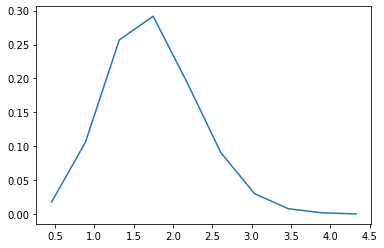

In [33]:
import matplotlib.pyplot as plt
plt.plot(hist[1][1:], hist[0] / hist[0].sum());

### Q3 : on veut créer une matrice identité un million par un million

Vous pouvez essayer sans réfléchir ou lire cette page d'abord : [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

$(10^6)^2=10^{12}$>10 Go, bref ça ne tient pas en mémoire sauf si on a une grosse machine. Les matrices creuses (ou sparses en anglais), sont adéquates pour représenter des matrices dont la grande majorité des coefficients sont nuls car ceux-ci ne sont pas stockés. Concrètement, la matrice enregistre uniquement les coordonnées des coefficients et les valeurs non nuls.

In [34]:
import numpy
from scipy.sparse import csr_matrix
ide = csr_matrix((1000000, 1000000), dtype=numpy.float64)
ide.setdiag(1.)

c:\python372_x64\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Q4 : vous devez créer l'application StopCovid

Il existe une machine qui reçoit la position de 3 millions de téléphones portable. On veut identifier les cas contacts (rapidement).

Si on devait calculer toutes les paires de distance, cela prendrait un temps fou. Il faut ruser. LE plus simple est de construire une grille sur le territoire français puis d'associer à chaque téléphone portable la grille dans laquelle il se trouve. Dans une cellule de la grille, le nombre de paires est beaucoup plus réduit. Ce n'est pas la seule astuce qu'il faudra utiliser. Mais c'est un bon début.